#### Preceptron example using keras

(500, 2)
(500, 2)


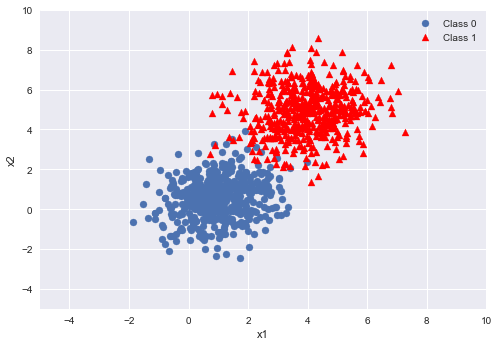

In [1]:
#Data preparation

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

plt.style.use("seaborn")
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [3]:
data = np.zeros((1000,3))
print(data.shape,"\n\n\n")

data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)
print(data[:10],"\n\n\n")

split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1000, 3) 



[[ 0.83807786 -0.60837699  0.        ]
 [ 3.45089477  6.60824291  1.        ]
 [ 0.97008806 -0.16738092  0.        ]
 [ 2.36913214  0.25955204  0.        ]
 [ 5.03651709  5.7631837   1.        ]
 [ 4.36367238  5.22580483  1.        ]
 [ 4.93885414  4.99156931  1.        ]
 [ 0.7072378   0.91550067  0.        ]
 [ 3.30248751  7.8566719   1.        ]
 [ 2.72322581  4.1631244   1.        ]] 



(800, 2) (200, 2)
(800,) (200,)


In [52]:
### Working on the model
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential(name = 'myModel')
model.add(Dense(1,activation = 'sigmoid'))
model.build(input_shape = (1,2))
model.summary()

Model: "myModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (1, 1)                    3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='mse', optimizer='adam')
hist = model.fit(X_train,Y_train,epochs=50,batch_size=32)

Epoch 1/50
800/800 [==============================] - 0s 107us/step - loss: 0.1398
Epoch 2/50
800/800 [==============================] - 0s 36us/step - loss: 0.1357
Epoch 3/50
800/800 [==============================] - 0s 32us/step - loss: 0.1317
Epoch 4/50
800/800 [==============================] - 0s 35us/step - loss: 0.1277
Epoch 5/50
800/800 [==============================] - 0s 47us/step - loss: 0.1239
Epoch 6/50
800/800 [==============================] - 0s 45us/step - loss: 0.1201
Epoch 7/50
800/800 [==============================] - 0s 42us/step - loss: 0.1164
Epoch 8/50
800/800 [==============================] - 0s 44us/step - loss: 0.1129
Epoch 9/50
800/800 [==============================] - 0s 41us/step - loss: 0.1094
Epoch 10/50
800/800 [==============================] - 0s 41us/step - loss: 0.1061
Epoch 11/50
800/800 [==============================] - 0s 41us/step - loss: 0.1029
Epoch 12/50
800/800 [==============================] - 0s 42us/step - loss: 0.0998
Epoch 13/50


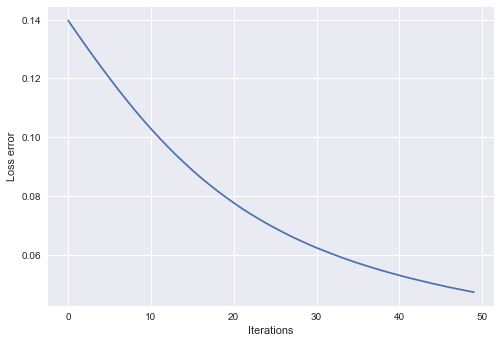

In [61]:
plt.plot(hist.history['loss'])
plt.xlabel("Iterations")
plt.ylabel("Loss error")
plt.show()

In [77]:
len(y_pred == Y_test)/len(y_pred)

1.0